In [1]:
import numpy as np
from scipy import optimize
from utils.plotData import plotData 
from utils.costFunction import costFunction 
from utils.plotDecisionBoundary import plotDecisionBoundary
from utils.sigmoid import sigmoid
from utils.predict import predict

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples


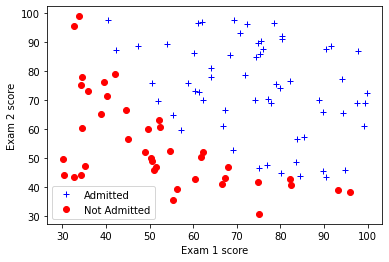

In [2]:
# Import features matrix and classifications
data = np.loadtxt('ex2data1.txt', delimiter=",")
X = data[:,0:2]
y = data[:,2]


print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples')
plotData(X,y)

In [3]:
# Setup the data matrix appropriately, and add ones for the intercept term

row, col = X.shape

X_intercept = np.ones((row,1))
X_padded = np.hstack((X_intercept,X))

initial_theta = np.zeros(X_padded.shape[1])
cost,grad= costFunction(initial_theta,X_padded,y)

In [4]:
#Compute and display initial cost and gradient
print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at test theta: {:.4f}, {:.4f}, {:.4f}'.format(*grad))
print('Expected gradients (approx): -0.1000, -12.0092, -11.2628\n\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost,grad = costFunction(test_theta, X_padded, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218');
print('Gradient at test theta: {:.3f}, {:.3f}, {:.3f}'.format(*grad))
print('Expected gradients (approx): 0.043, 2.566, 2.647')

Cost at test theta: 0.693
Expected cost (approx): 0.693
Gradient at test theta: -0.1000, -12.0092, -11.2628
Expected gradients (approx): -0.1000, -12.0092, -11.2628


Cost at test theta: 0.218
Expected cost (approx): 0.218
Gradient at test theta: 0.043, 2.566, 2.647
Expected gradients (approx): 0.043, 2.566, 2.647


In [5]:
# Compute optimal parameters using the scipy 
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_padded, y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
theta = res.x

print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203');

print('Theta:{:.3f}, {:.3f}, {:.3f}'.format(*theta))
print('Expected theta (approx): -25.161, 0.206, 0.201')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203
Theta:-25.161, 0.206, 0.201
Expected theta (approx): -25.161, 0.206, 0.201


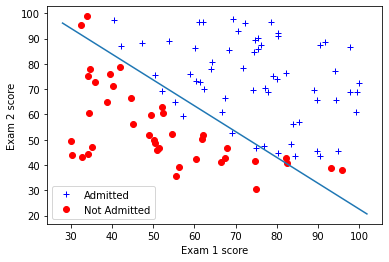

In [6]:
# Plot decision boundary
plotDecisionBoundary(theta, X_padded,y)

In [7]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 
grades = np.array([1, 45, 85])
prob = sigmoid(grades.dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002')


For a student with scores 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002


In [8]:
# Compute accuracy on our training set
p = predict(theta, X_padded)
accuracy = np.mean(y==p)*100
print('Train Accuracy: {}%'.format(accuracy))
print('Expected accuracy (approx): 89.0')


Train Accuracy: 89.0%
Expected accuracy (approx): 89.0


Accuracy Score: 0.96


<AxesSubplot:>

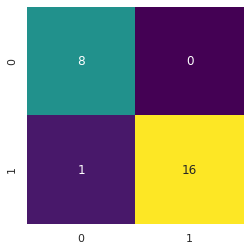

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns;sns.set()

data = np.loadtxt('ex2data1.txt', delimiter=",")
X = data[:,0:2]
y = data[:,2]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=420)
model = GaussianNB()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

acc = accuracy_score(y_test,prediction)
mat=confusion_matrix(y_test,prediction)

print(f"Accuracy Score: {acc}")
sns.heatmap(mat,square=True, annot=True, cbar=False,cmap="viridis")